In [39]:
%matplotlib inline
from stack_nlp import *
from jupyter_mplsettings import *
matplotlib.rc('font', **font)

In [2]:
cfg = local_import("./default.py")

In [3]:
PrepareData(cfg)

Shape of question df (1696819, 21)
Shape of answer df (2028240, 21)


In [4]:
data = cfg.data

In [5]:
data.keys()

['meta', 'dict', 'features', 'answers']

In [6]:
qs = data["meta"];

In [7]:
qs.head()
print qs.shape

(673622, 37)


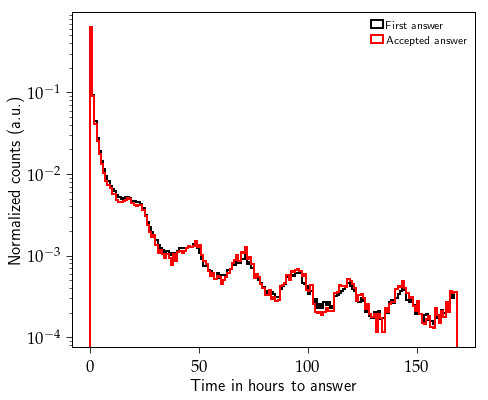

In [40]:
plt.figure(figsize=(8, 6))
plt.xlabel(r"Time in hours to answer")
plt.ylabel(r"Normalized counts (a.u.)")
plt.hist(qs.dt_answer.dt.total_seconds() * 1. / 3600, range=[0, 7 * 24], bins=7 * 24, 
         histtype="step", lw=2, color="k", label="First answer", normed=True);
plt.hist(qs.dt_accanswer.dt.total_seconds() * 1. / 3600, range=[0, 7 * 24], bins=7 * 24,
        histtype="step", lw=2, color="r", label="Accepted answer", normed=True);
plt.semilogy(nonposy="clip")
plt.legend(loc="upper right");

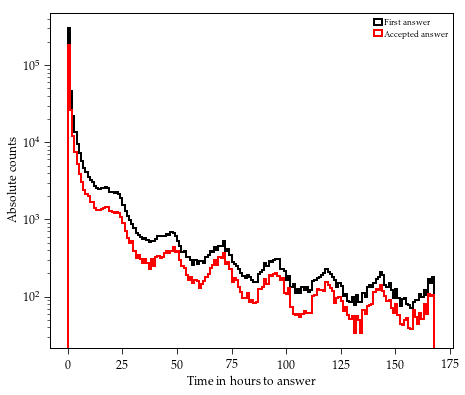

In [9]:
plt.figure(figsize=(8, 6))
plt.xlabel(r"Time in hours to answer")
plt.ylabel(r"Absolute counts")
plt.hist(qs.dt_answer.dt.total_seconds() * 1. / 3600, range=[0, 7 * 24], bins=7 * 24, 
         histtype="step", lw=2, color="k", label="First answer");
plt.hist(qs.dt_accanswer.dt.total_seconds() * 1. / 3600, range=[0, 7 * 24], bins=7 * 24,
        histtype="step", lw=2, color="r", label="Accepted answer");
plt.semilogy(nonposy="clip")
plt.legend(loc="upper right");

[]

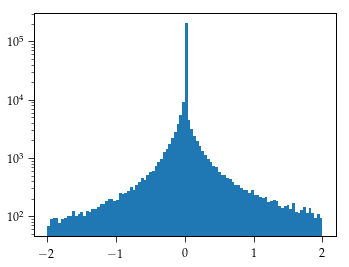

In [10]:
plt.hist((qs.dt_accanswer - qs.dt_answer).dt.total_seconds() * 1. / 3600, range=[-2, 2], bins=100);
plt.semilogy(nonposy="clip")

In [11]:
print np.sum(~qs.dt_answer.isnull())
print np.sum(~qs.dt_accanswer.isnull())

536044
307514


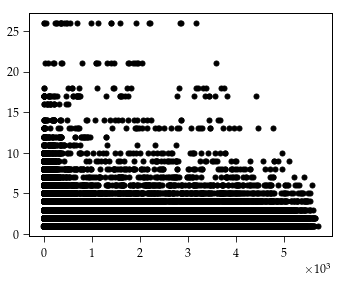

In [12]:
plt.plot(qs.dt_answer.dt.total_seconds() * 1. / 3600, qs.AnswerCount, "k.")

In [26]:
qs.columns

Index([u'AcceptedAnswerId', u'AnswerCount', u'BodyNCodes', u'BodyNQMarks',
       u'BodySize', u'ClosedDate', u'CommentCount', u'CommunityOwnedDate',
       u'CreationDate', u'FavoriteCount', u'Id', u'LastActivityDate',
       u'LastEditDate', u'LastEditorUserId', u'OwnerUserId', u'ParentId',
       u'PostTypeId', u'Score', u'Tags', u'Title', u'ViewCount', u'titlelen',
       u'hasAnswers', u'dt_created', u'Id_r', u'hot_indices', u'nwords',
       u'ordersum', u'prob_bern', u'prob_poiss', u'ratio', u'ParentId_first',
       u'CreationDate_first', u'Id_acc', u'CreationDate_acc', u'dt_answer',
       u'dt_accanswer'],
      dtype='object')

[ 1.  4.]


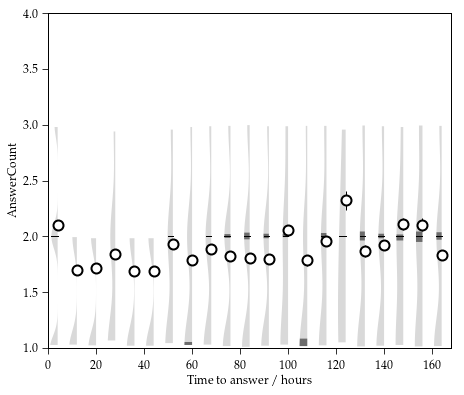

[ 0.  7.]


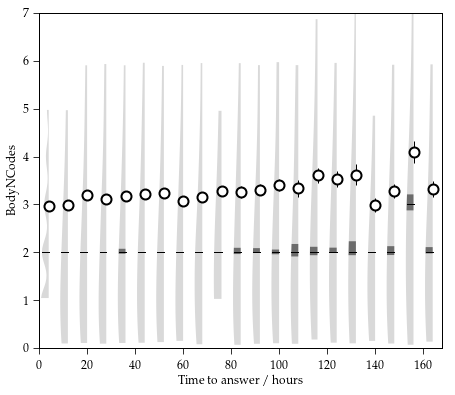

[ 0.  3.]


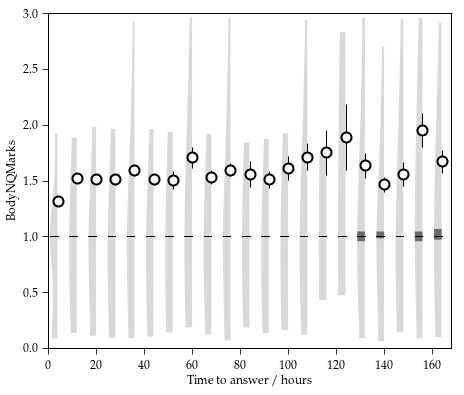

[  396.  3127.]


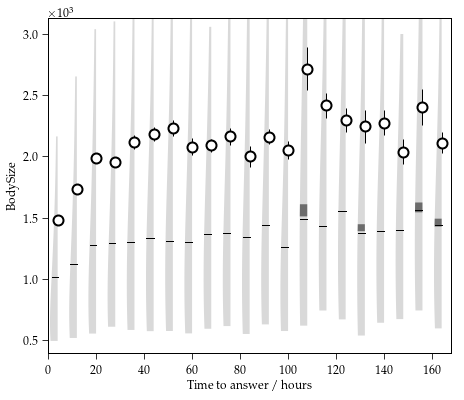

[ 31.  80.]


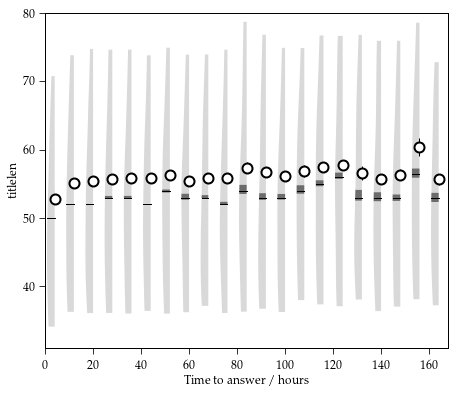

[ 14.  74.]


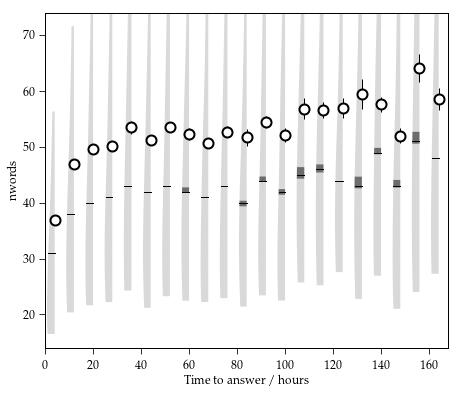

[  2974.  23345.]


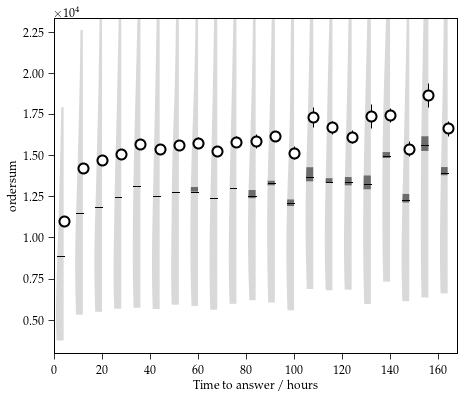

[ 0.26086957  0.88235294]


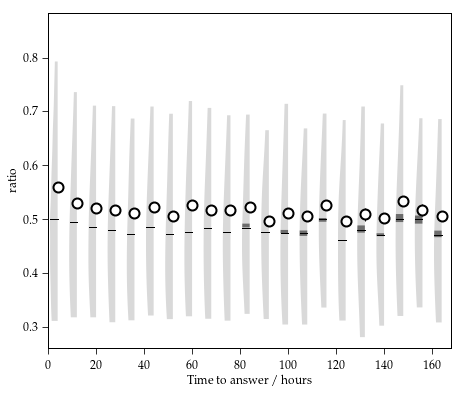

[ 0.  2.]


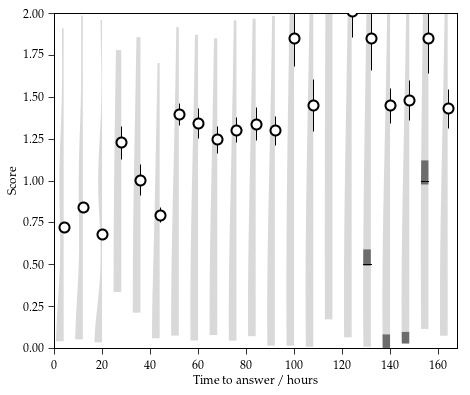

[  2.23909674e-54   3.09808260e-18]


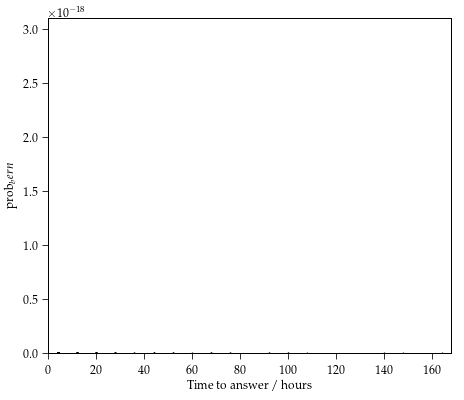

In [28]:
from scipy.stats.mstats import mquantiles

qs.columns
dthours = qs.dt_accanswer.dt.total_seconds() * 1. / 3600
m = np.isfinite(dthours)

ndays = 14
# dthours = qs.dt_answer.dt.total_seconds() * 1. / 3600
cols = ["AnswerCount", "BodyNCodes", "BodyNQMarks", "BodySize", "titlelen", "nwords", "ordersum", "ratio", "Score", "prob_bern"]
# f, axarr = plt.subplots(2, 4, squeeze=False)
for i, col in enumerate(cols):
    quants = mquantiles(qs[m][col], prob=[0.1, 0.9])
    print quants
    plt.figure(i, figsize=(8, 6))
    plt.xlabel(r"Time to answer / hours")
    plt.ylabel(r"%s" % col)
#     plt.plot(dthours, qs[col], "k.")
    QuickSlicePlot(dthours[m], qs[m][col], dthours[m], zbins=1, yrange=quants, 
                   xRange=[0, ndays * 24], xbins=4 * ndays, draw="amvs",
                   axes=plt.gca())
    plt.xlim(0, ndays * 24)
    plt.show()
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
# plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
# plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)